# Explorative Datenanalyse

Im fogenden Notebook ist die explorative Datenanalyse von den 11'760 SRF Artikeln zu 12 unterschielichen Nachnamen.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import sys
sys.path.append('../')
from src.eda import (info_categories,
                     plot_articles_per_cat,
                     plot_cat_per_term,
                     plot_cat_per_term_grid,
)

## Daten einlesen

In [2]:
data = pd.read_csv('../output/df_namen.csv')
data

,Suchbegriff,Titel,Datum,Autor,Kategorie,Unterkategorie
0,Torres,Wechsel von Torres zu Barcelona fix – Mbabu fe...,"28.12.2021, 14:05 Uhr",Unbekannt,Sport,Fussball
1,Torres,Aegerter verpasst das Wunder – Gesamtsieg an T...,"11.10.2020, 14:28 Uhr",Unbekannt,Sport,Motorsport
2,Torres,Honorar von Dufry-Präsident Torres Carretero g...,"30.07.2019, 18:55 Uhr",Lorenzo Bonati,News,Wirtschaft
3,Torres,Torres kündigt Rücktritt an,"20.06.2019, 19:00 Uhr",Unbekannt,Sport,Fussball
4,Torres,Iniesta und Torres sagen «Adios»,"20.05.2018, 22:03 Uhr",Unbekannt,Sport,Fussball
...,...,...,...,...,...,...
11755,Luder,So will die Stadt Luzern ihr Parkplatzproblem ...,"19.05.2020, 10:00 Uhr",Unbekannt,News,News
11756,Luder,Luzerner Kantonsrat verlangt Transparenz über ...,"18.05.2020, 16:18 Uhr",Unbekannt,News,News
11757,Luder,Luzerner Kantonsparlament verschiebt Corona-De...,"17.05.2020, 15:08 Uhr",Unbekannt,News,News
11758,Luder,Luzern trainiert bereits am 18. Mai wieder,"16.05.2020, 11:30 Uhr",Unbekannt,Sport,Fussball


## Erster Überblick

### Nachnamen - Kategorie

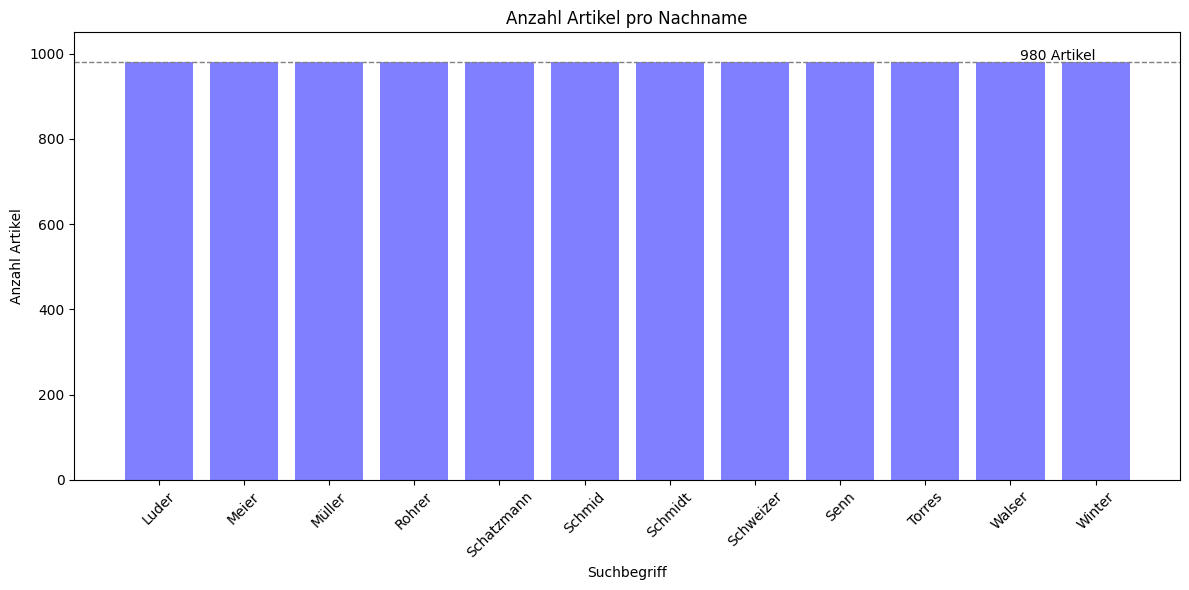

In [3]:
# visueller doppelcheck, dass es pro Nachnamen 980 Artikel gibt
counts = data['Suchbegriff'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(counts.index, counts.values, color='blue', alpha=0.5)

# Einheitliche Y-Achse für visuelle Vergleichbarkeit
plt.ylim(0, 1050)

# Horizontale Linie einzeichnen, um Gleichverteilung zu verdeutlichen
plt.axhline(y=980, color='gray', linestyle='--', linewidth=1)
plt.text(len(counts) - 1, 985, '980 Artikel', ha='right', color='black')
plt.xlabel('Suchbegriff')
plt.ylabel('Anzahl Artikel')
plt.title('Anzahl Artikel pro Nachname')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Man erkennt in dem Plot, dass alle Nachnamen genau 980 Artikel haben. Das bedeutet, dass das Scraping erfolgreich war und alle Nachnamen gleich viele Artikel haben.

In [4]:
# Anzahl Artikel je Kategorie über das gesamte df
info_categories(data, "Kategorie")

info_categories(data, 'Unterkategorie')

Distinct count of Kategorie: 159

Kategorie
Sport                   4476
News                    4366
Kultur                  1157
Radio SRF 3              236
Glanz & Gloria           204
Wissen                   193
Radio SRF 1              171
Radio SRF Musikwelle     146
Kassensturz Espresso     142
Meteo                    124
Name: count, dtype: int64

Distinct count of Unterkategorie: 159

Unterkategorie
News                       1821
Fussball                   1705
Schweiz                    1377
Mehr Sport                 1229
Eishockey                  1089
International               755
Film & Serien               437
Wirtschaft                  297
Gesellschaft & Religion     250
Glanz & Gloria              191
Name: count, dtype: int64



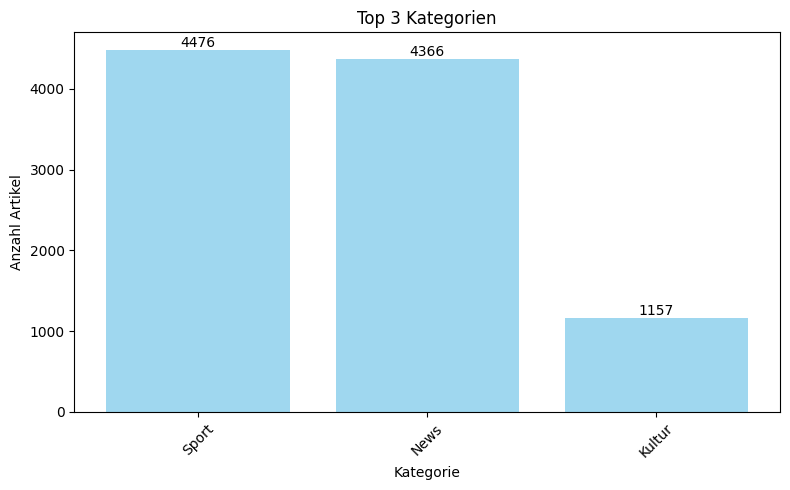

In [5]:
# Top 3 Kategorien insgesamt
top3_categories = data['Kategorie'].value_counts().head(3)

# Bar chart erstellen
plt.figure(figsize=(8, 5))
bars = plt.bar(top3_categories.index, top3_categories.values, color='skyblue', alpha=0.8)
plt.xlabel('Kategorie')
plt.ylabel('Anzahl Artikel')
plt.title('Top 3 Kategorien')
plt.xticks(rotation=45)

# Werte über den Balken anzeigen
for bar, count in zip(bars, top3_categories.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

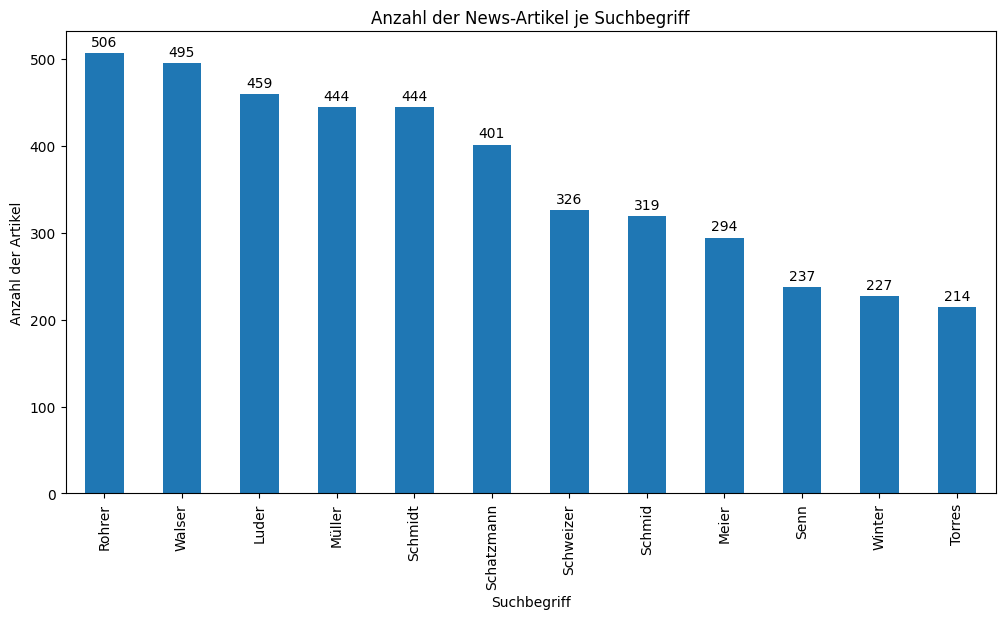

In [6]:
# für eine beliebige Kategorie die Anzahl Artikel je Nachnamen
plot_articles_per_cat(data, "News")

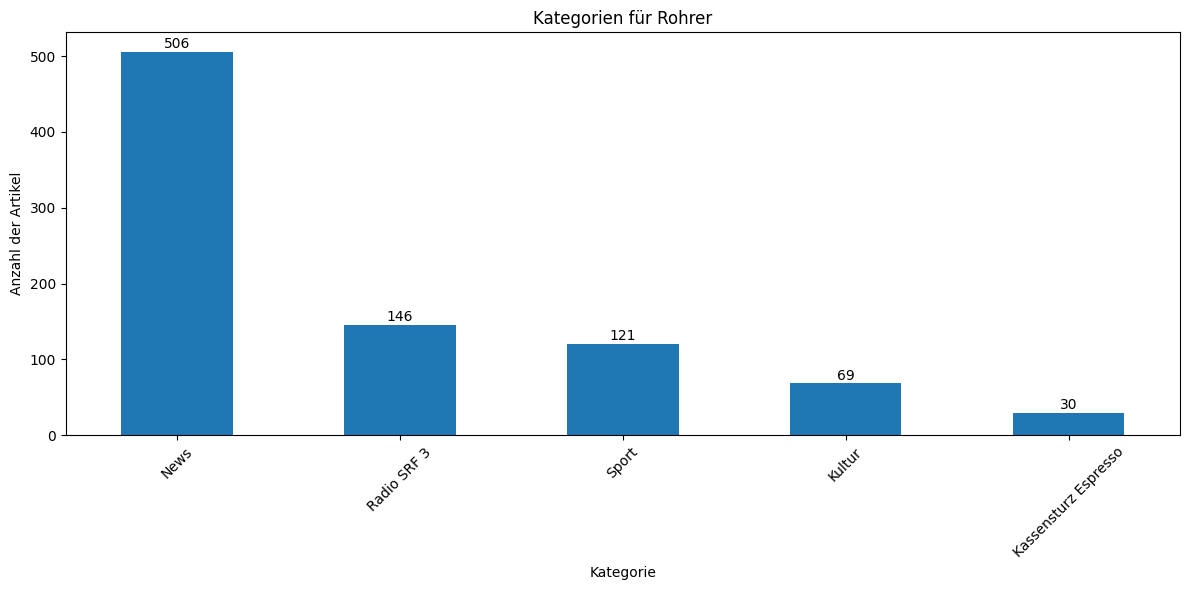

In [7]:
# Für beliebigen Nachnamen die top 5 Kategorien
plot_cat_per_term(data, "Rohrer")

Die obigen zwei Plots geben einen ersten Überblick übe die Verteilung der Kategorien in Bezug auf die Nachnamen. So hat zu, Beispiel der Nachname *Rohrer* die meisten Artikel in der Kategorie *News*, während *Torres* die wenigsten hat. 

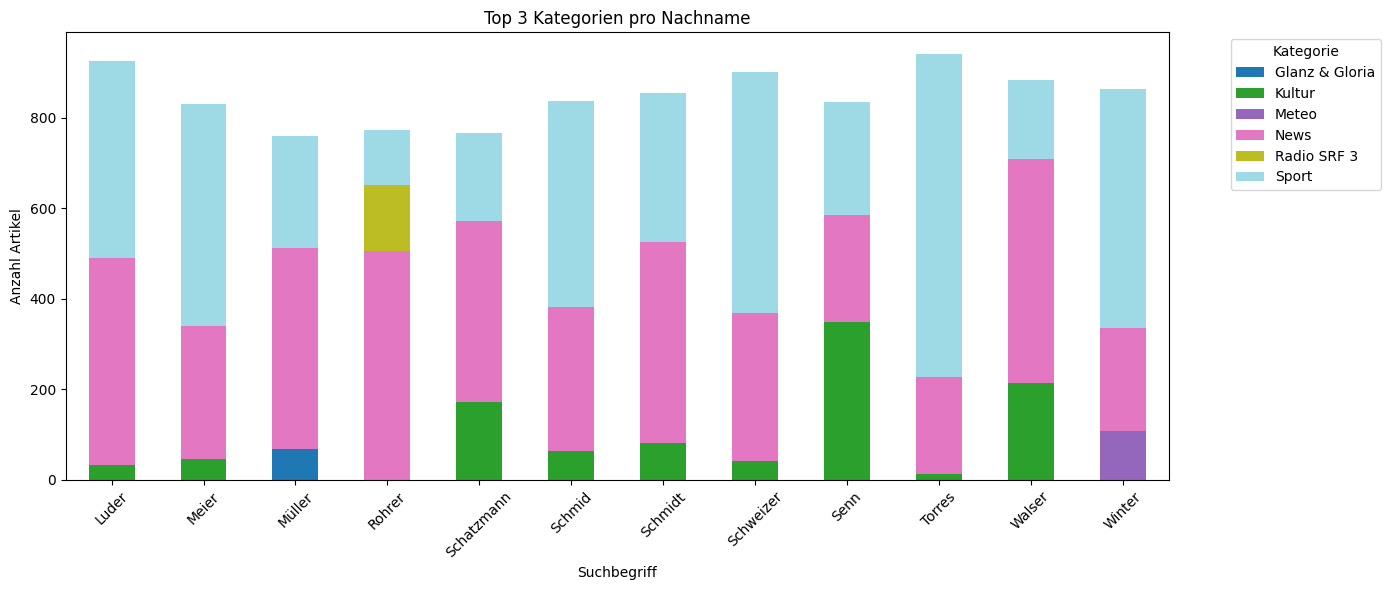

In [8]:
# Top 3 Kategorien je Suchbegriff extrahieren
top3_per_name = (
    data.groupby(['Suchbegriff', 'Kategorie'])
    .size()
    .reset_index(name='count')
    .sort_values(['Suchbegriff', 'count'], ascending=[True, False])
    .groupby('Suchbegriff')
    .head(3)
)
pivot_df = top3_per_name.pivot(index='Suchbegriff', columns='Kategorie', values='count').fillna(0)
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.xlabel('Suchbegriff')
plt.ylabel('Anzahl Artikel')
plt.title('Top 3 Kategorien pro Nachname')
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In der Grafik werden pro Nachname die 3 häufigsten Kategorien angezeigt. Man erkennt eindeutig, dass die Kategorien *Sport* und *News* die häufigsten sind. 


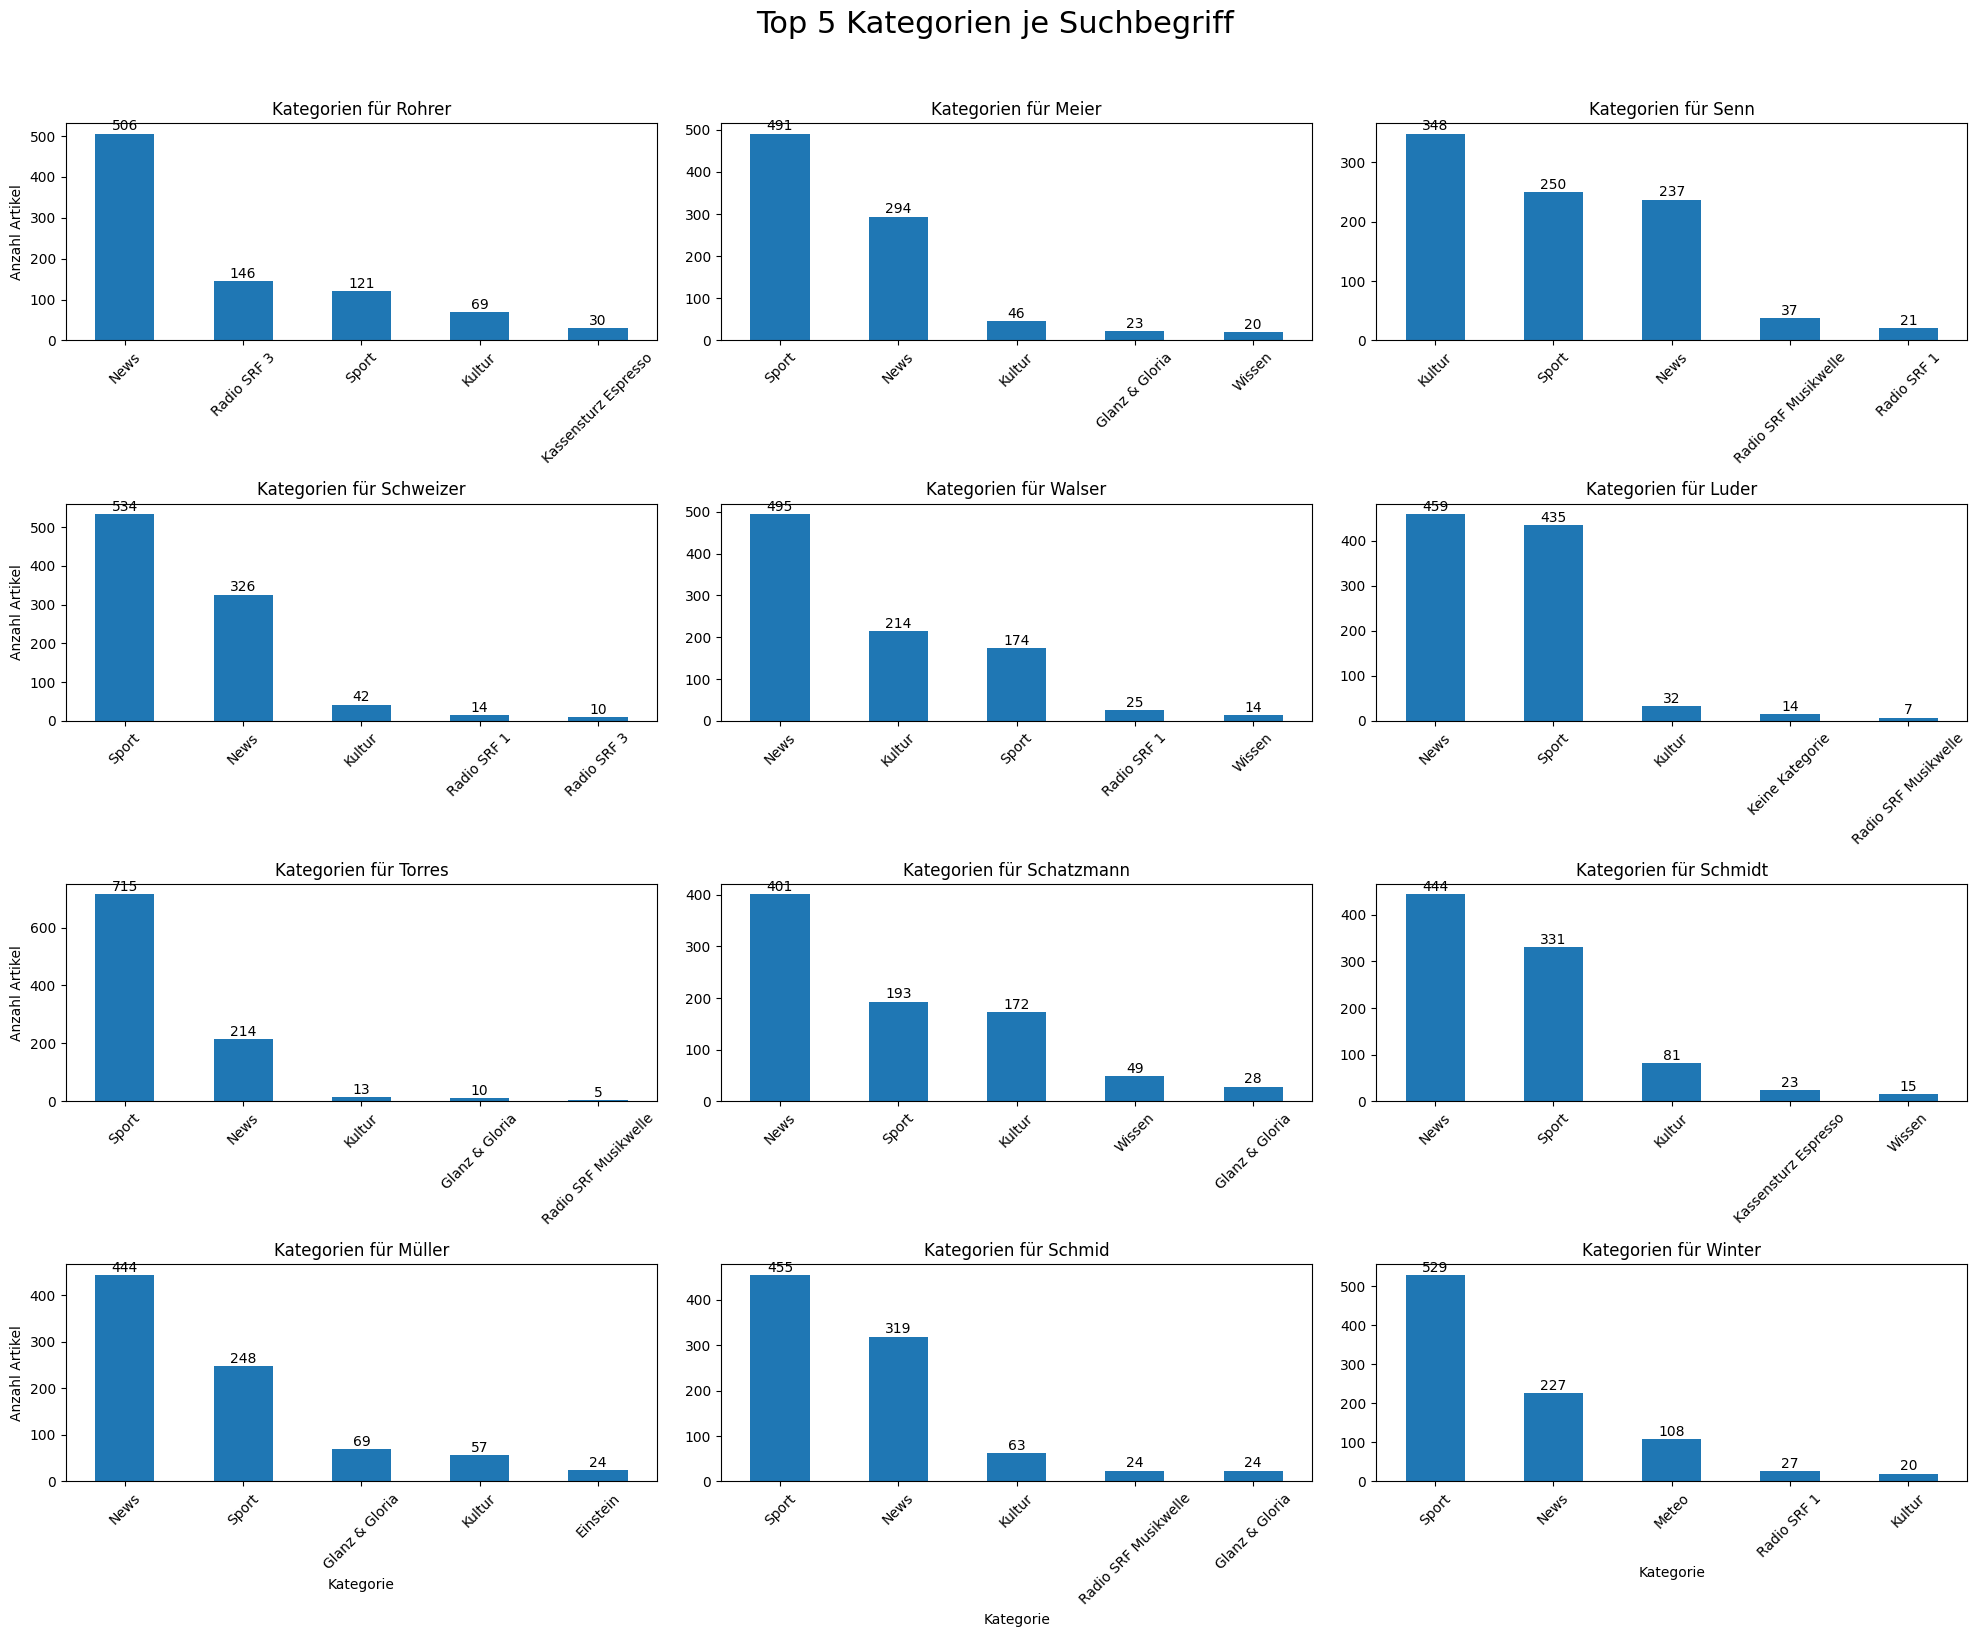

In [9]:
# Beispiel-Aufruf:
suchbegriffe = [
    "Rohrer", "Meier", "Senn", 
    "Schweizer", "Walser", "Luder", 
    "Torres", "Schatzmann", "Schmidt",
    "Müller", "Schmid", "Winter"
]
plot_cat_per_term_grid(data, suchbegriffe)


Die zwei obigen Grafiken zeigen, dass bei allen Nachnamen, ausgeschlossen Rohrer, Senn und Walser sind die Kategorien News und Sport am stärksten vertreten.

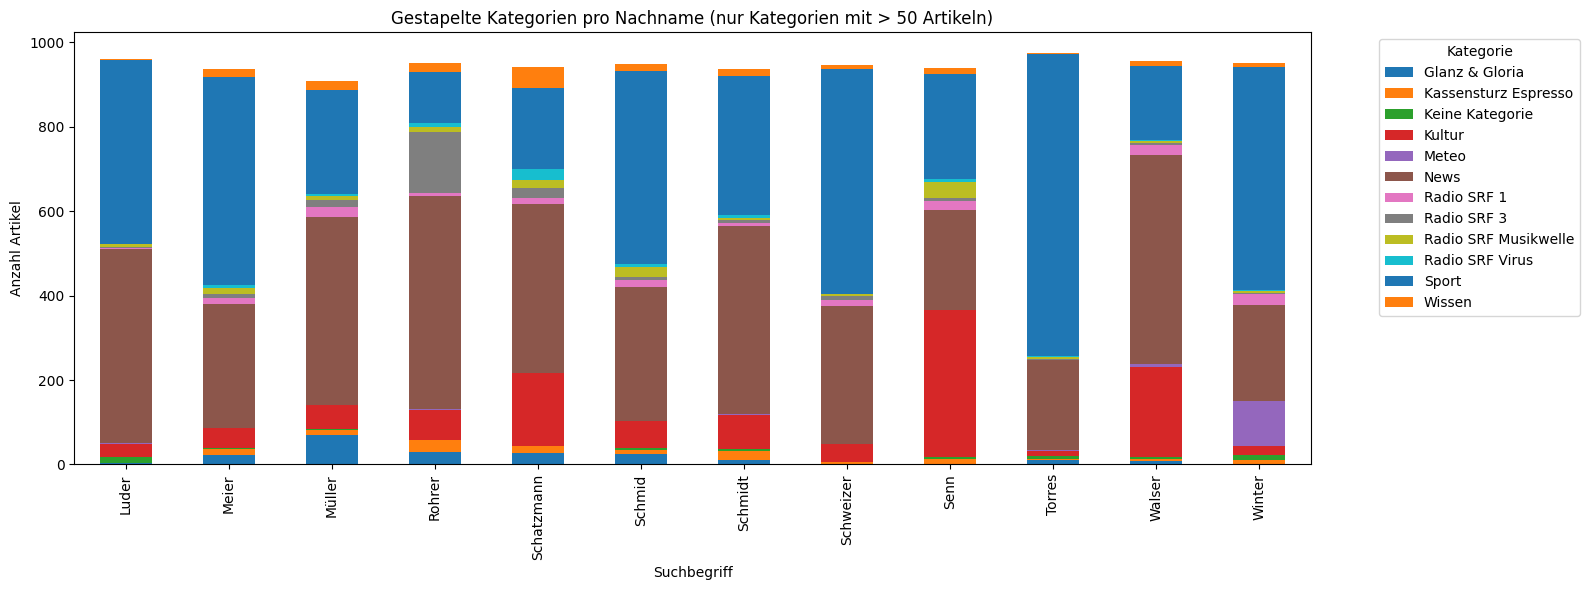

In [10]:
# für alle Nachnamen die Kategorien von denen es mehr wie 50 Artikel gibt anzeigen
category_counts = data.groupby(['Suchbegriff', 'Kategorie']).size().unstack(fill_value=0)
filtered_category_counts = category_counts.loc[:, category_counts.sum() > 50]
filtered_category_counts.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.xlabel('Suchbegriff')
plt.ylabel('Anzahl Artikel')
plt.title('Gestapelte Kategorien pro Nachname (nur Kategorien mit > 50 Artikeln)')
plt.legend(title='Kategorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Dieser Plot ist ähnlich zum obigen. Er zeigt jedoch alle Kategorien, die mehr als 50 Artikel haben. Die anderen Kateogrien sind im Vergleich zu *Sport* und *News* wenig vertreten.

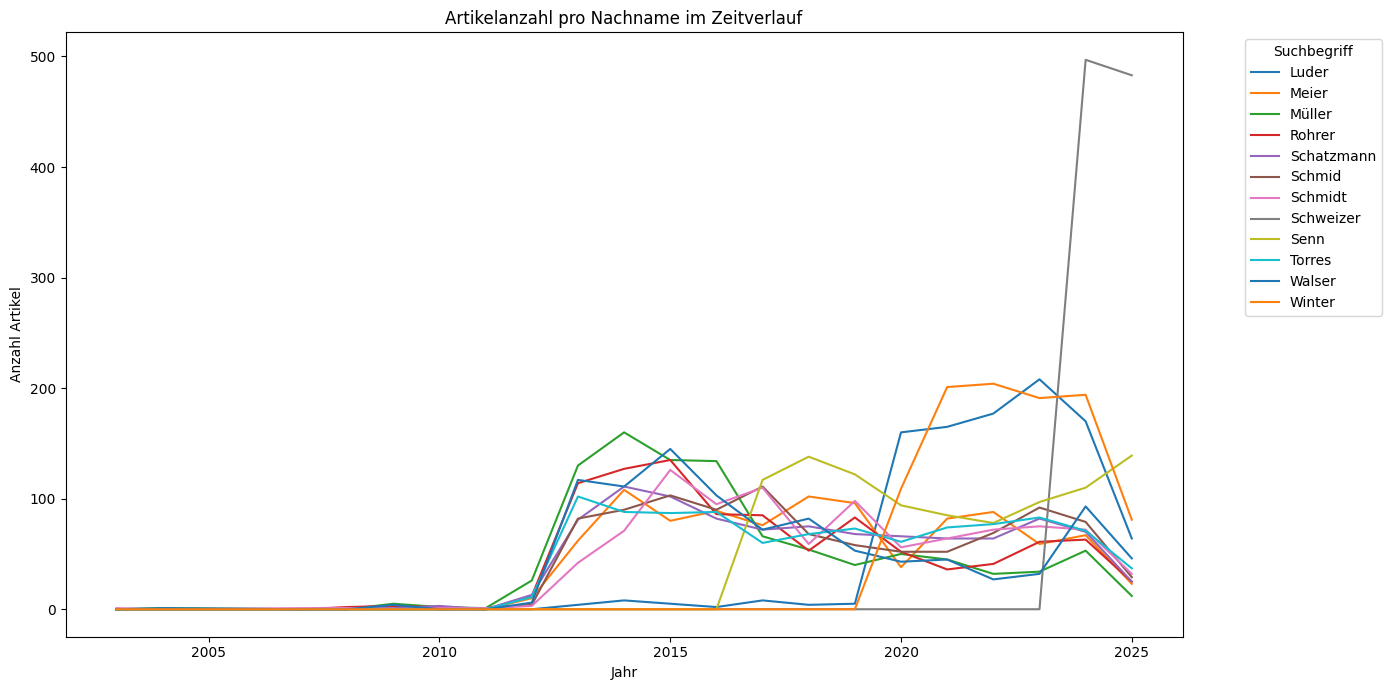

In [11]:
# Datum in ein Datetime-Objekt umwandeln
data['Datum_clean'] = pd.to_datetime(data['Datum'].str.extract(r'(\d{2}\.\d{2}\.\d{4})')[0], format='%d.%m.%Y', errors='coerce')

# Nach Jahr gruppieren
data['Jahr'] = data['Datum_clean'].dt.year
yearly_counts = data.groupby(['Jahr', 'Suchbegriff']).size().unstack(fill_value=0)

yearly_counts.plot(figsize=(14, 7))
plt.xlabel('Jahr')
plt.ylabel('Anzahl Artikel')
plt.title('Artikelanzahl pro Nachname im Zeitverlauf')
plt.legend(title='Suchbegriff', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# linie erst ab dem ersten Datenpunkt

In [12]:
import plotly.express as px

gantt_data = data.groupby('Suchbegriff').agg(
    start_date=('Datum_clean', 'min'),
    end_date=('Datum_clean', 'max')
).reset_index()

# Create a Gantt chart
fig = px.timeline(
    gantt_data,
    x_start="start_date",
    x_end="end_date",
    y="Suchbegriff",
    title="Dauer der Veröffentlichung des Artikels pro Nachname",
    labels={"Suchbegriff": "Search Term", "start_date": "Start Date", "end_date": "End Date"}
)
fig.update_yaxes(categoryorder="total ascending")
fig.update_layout(xaxis_title="Jahr", yaxis_title="Suchbegriff", showlegend=False)
# Remove background and sort descending
fig.update_layout(plot_bgcolor='white')
fig.update_yaxes(categoryorder="total descending")
fig.show()

Im Webscrapung werden die neusten Artikel zu erst gescraped. Abhängig von der Anzahl aktueller Artikel mit dem jeweiligen Suchbegriff wird der Gernzwert von 980 Artikel früher oder später erreicht.

Vergleicht man `Schweizer` mit `Schmidt` sieht man, dass beim ersten die Anzahl Artikel viel früher erreicht wird. 

### Nachnamen - Unterkategorie

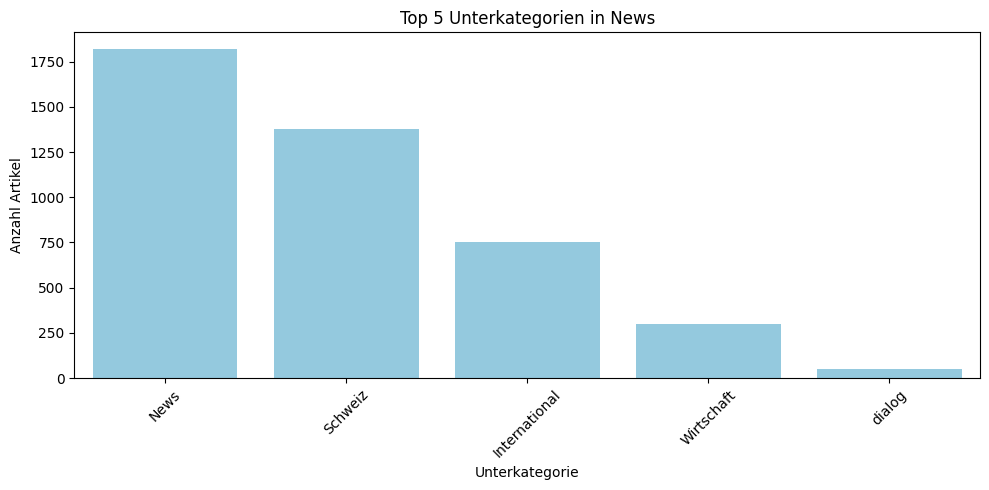

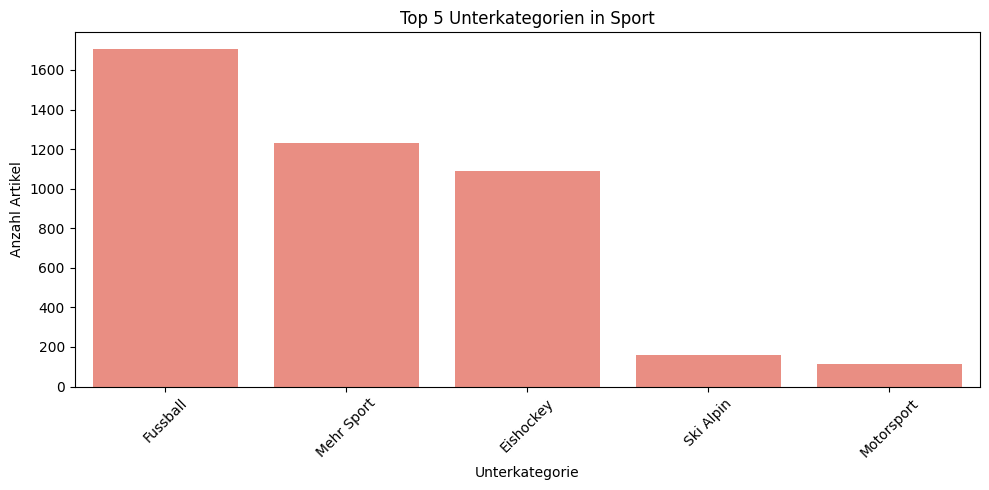

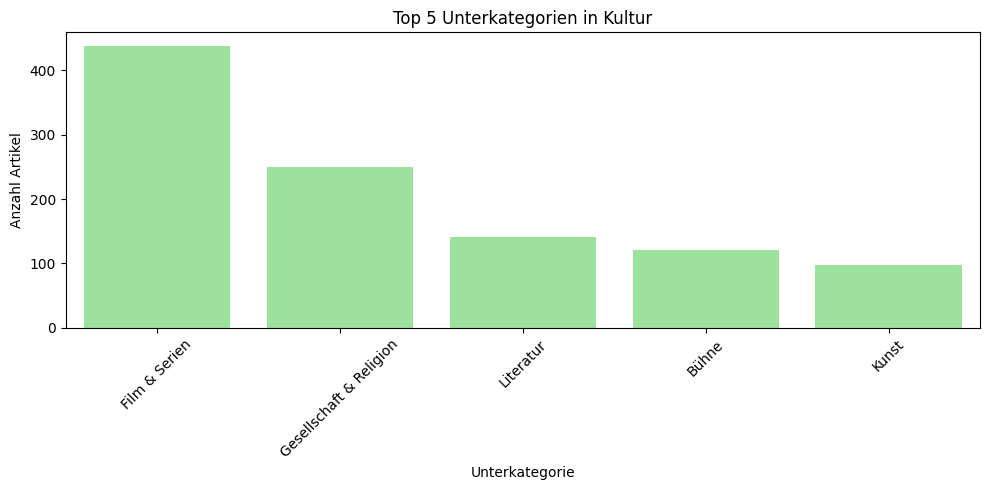

In [13]:
# Unterkategorien für News und Sport
# Filter für News
news_data = data[data['Kategorie'] == 'News']
news_counts = news_data['Unterkategorie'].value_counts()
# Nur die Top 5 Unterkategorien auswählen
news_counts = news_counts.head(5)

# Plot für News
plt.figure(figsize=(10, 5))
sns.barplot(x=news_counts.index, y=news_counts.values, color='skyblue')

plt.title('Top 5 Unterkategorien in News')
plt.xlabel('Unterkategorie')
plt.ylabel('Anzahl Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Filter für Sport
sport_data = data[data['Kategorie'] == 'Sport']
sport_counts = sport_data['Unterkategorie'].value_counts()

# Nur die Top 5 Unterkategorien auswählen
sport_counts = sport_counts.head(5)

# Plot für Sport
plt.figure(figsize=(10, 5))
sns.barplot(x=sport_counts.index, y=sport_counts.values, color='salmon')
plt.title('Top 5 Unterkategorien in Sport')
plt.xlabel('Unterkategorie')
plt.ylabel('Anzahl Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Filter für Kultur
kultur_data = data[data['Kategorie'] == 'Kultur']
kultur_counts = kultur_data['Unterkategorie'].value_counts()

# Nur die Top 5 Unterkategorien auswählen
kultur_counts = kultur_counts.head(5)

# Plot für Kultur
plt.figure(figsize=(10, 5))
sns.barplot(x=kultur_counts.index, y=kultur_counts.values, color='lightgreen')
plt.title('Top 5 Unterkategorien in Kultur')
plt.xlabel('Unterkategorie')
plt.ylabel('Anzahl Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Das sind die häufigsten Unterkategorien der Kategorien `Sport` und `News`. 

Bei der Kategorie `News` ist die häufigste Unterkategorie `News`. In einerm nächsten Schritt, sollte untersucht werden was in den Kategorien und den Unterkategorien alles als News gilt. 

Bei der Kategorie `Sport` Fussball die häufigste Unterkategorie gefolgt von `Mehr Sport` und `Eishockey`. Für eine vertiefe Analyse der Daten wäre die Unterkategorie genauer zu analysiere undzu sehen wie die aufgeteilt ist.

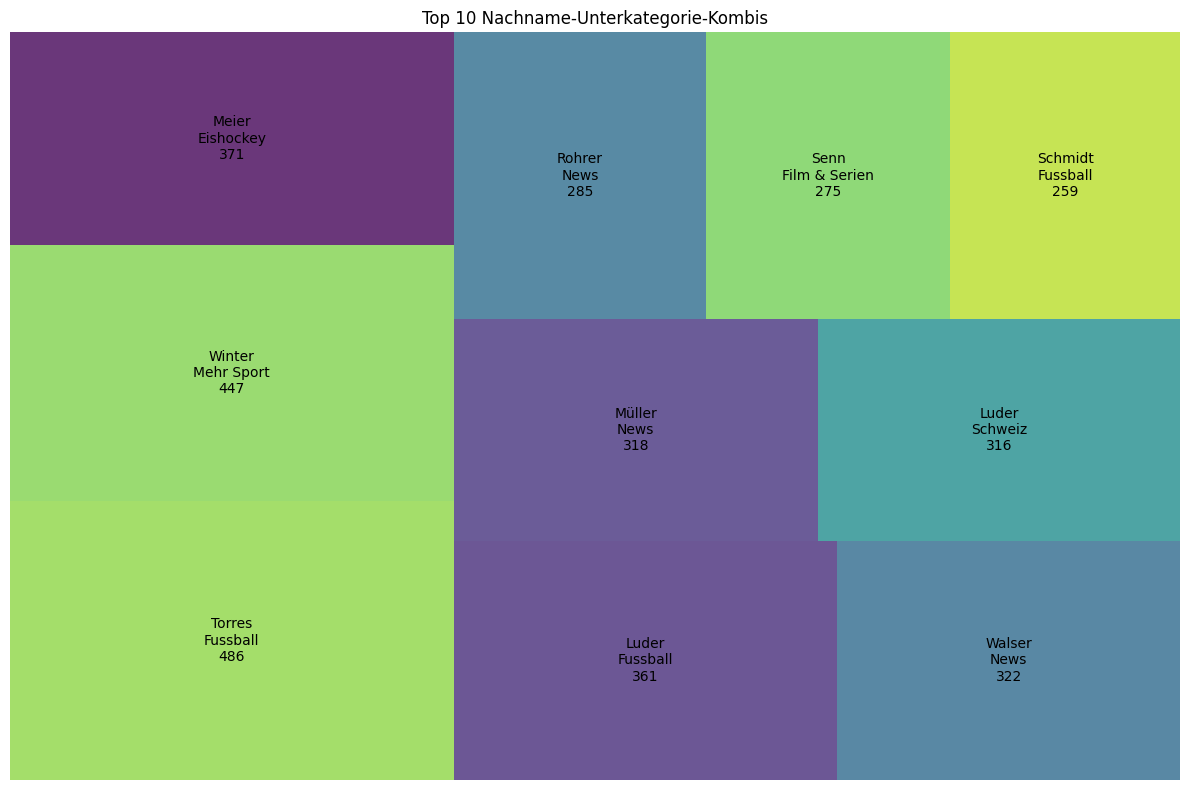

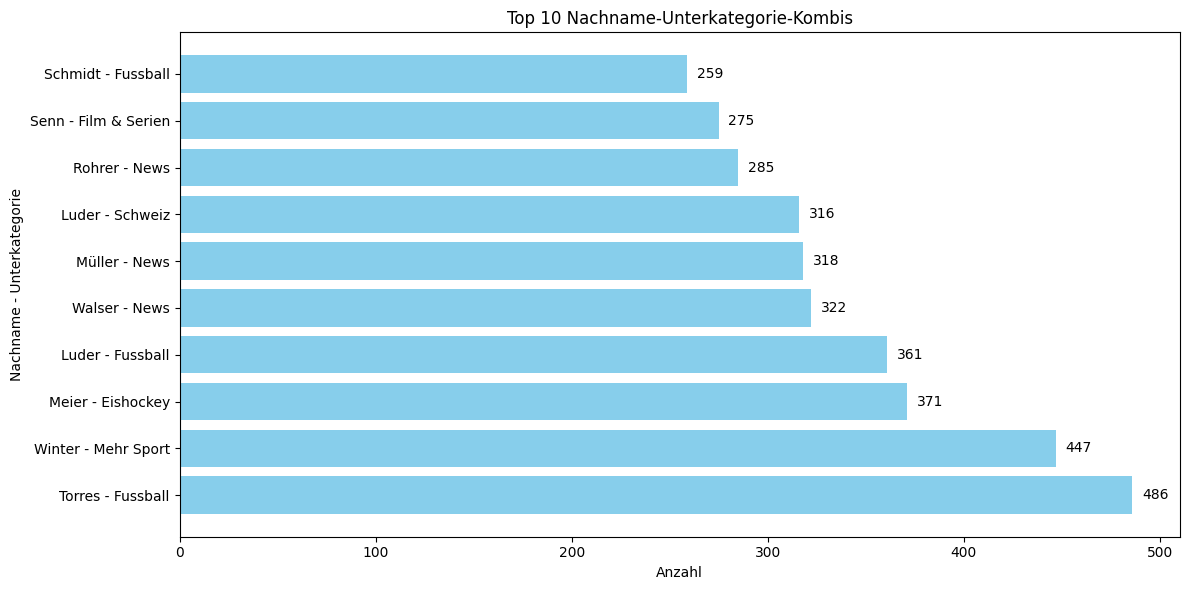

In [14]:
# Top 10 Kombinationen für Übersichtlichkeit
top_combos = data.groupby(['Suchbegriff', 'Unterkategorie']).size().sort_values(ascending=False).head(10)
labels = [f"{i[0]}\n{i[1]}\n{v}" for i, v in top_combos.items()]
sizes = top_combos.values

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.title('Top 10 Nachname-Unterkategorie-Kombis')
plt.axis('off')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
bars = plt.barh([f"{i[0]} - {i[1]}" for i in top_combos.index], sizes, color='skyblue')
plt.xlabel('Anzahl')
plt.ylabel('Nachname - Unterkategorie')

# Anzahl der Artikel rechts neben den Bars anzeigen
for bar, size in zip(bars, sizes):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, str(size), va='center')
plt.title('Top 10 Nachname-Unterkategorie-Kombis')
plt.tight_layout()
plt.grid(False)
plt.show()


Die häufigsten Kombinationen von Nachnamen und Unterkategorien sind in der Grafik dargestellt. Am häufigsten ist die Kombination `Torres` und `Fussball` vertreten. Diese Erkenntnis ist logisch, da ein bekannter Fussballspieler Torres zum Nachnamen heisst.

### Autoren

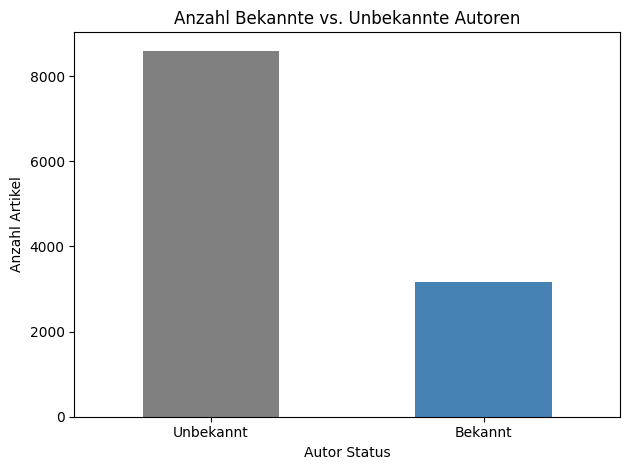

In [15]:
# Anzahl Artikel pro Autor
# Definiere unbekannte Autoren
unknown_labels = ['unknown', 'unbekannt', 'na', 'n/a', '']  # erweiterbar je nach Daten
data['Autor_clean'] = data['Autor'].fillna('unknown').str.strip().str.lower()

# Gruppierung in bekannt/unknown
data['Autor_status'] = data['Autor_clean'].apply(lambda x: 'Unbekannt' if x in unknown_labels else 'Bekannt')
counts = data['Autor_status'].value_counts()

# Plot
counts.plot(kind='bar', color=['gray', 'steelblue'])
plt.title('Anzahl Bekannte vs. Unbekannte Autoren')
plt.ylabel('Anzahl Artikel')
plt.xlabel('Autor Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Bei mehr als 70% aller Artikel ist der Autor nicht bekannt (über 8500 Artikel).

Der Grund: wir extrahieren den Autornamen im jeweligen Artikel aus dem header. Manchaml findet man den Autor auch in der main class des Artikels. Der Autor ist dort aber nur mit drei Buchstaben aufgeführt. Da wir keine Liste mit den vollen Namen gfeunden haben, haben wir davon abgesehen das Kürzel zu scrapen.

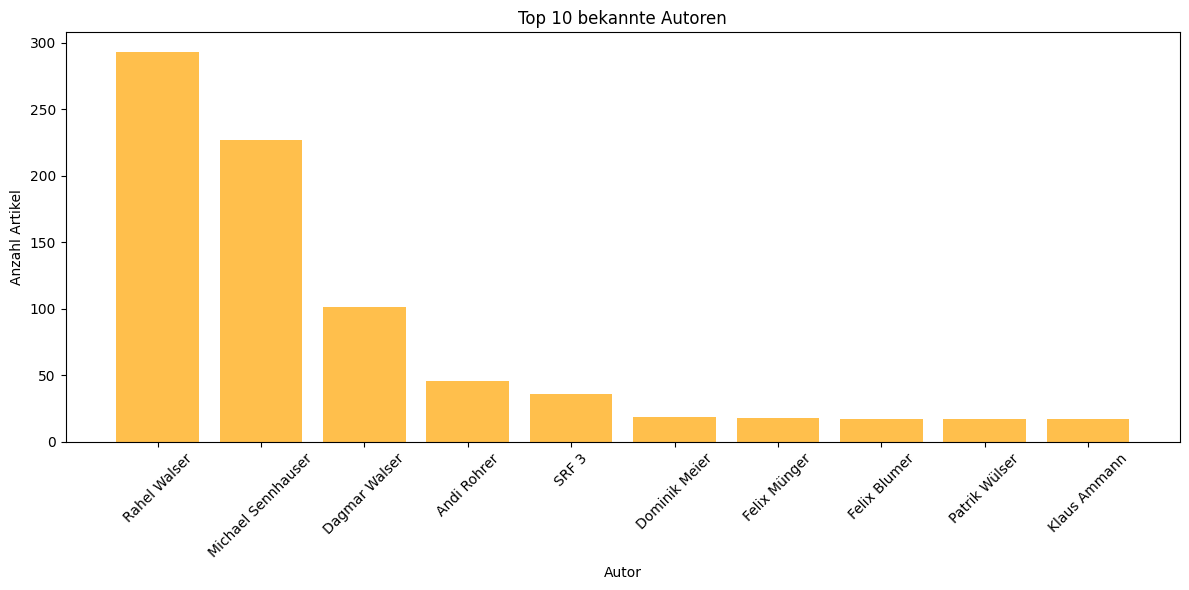

In [16]:
# Definiere "unbekannte" Autoren
unknown_labels = ['unknown', 'unbekannt', 'n/a', '', 'na']
author_series = data['Autor'].fillna('').str.strip().str.lower()

# Bekannte Autoren filtern
known_authors = data[~author_series.isin(unknown_labels)]

# Top 10 bekannte Autoren zählen
author_counts = known_authors['Autor'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(author_counts.index, author_counts.values, color='orange', alpha=0.7)
plt.xlabel('Autor')
plt.ylabel('Anzahl Artikel')
plt.title('Top 10 bekannte Autoren')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Filter für die Kategorie "Radio SRF 3"
srf3_data = data[data['Kategorie'] == 'Radio SRF 3']

# Zähle die Artikel pro Autor
srf3_author_counts = srf3_data['Autor_clean'].value_counts().head(10)

# Ausgabe
srf3_author_counts

Autor_clean
unbekannt           72
andi rohrer         46
srf 3               36
guido berger         6
schimun krausz       5
gregi sigrist        5
peter buchmann       3
eliane laubscher     3
jürg tschirren       2
lisa wickart         2
Name: count, dtype: int64

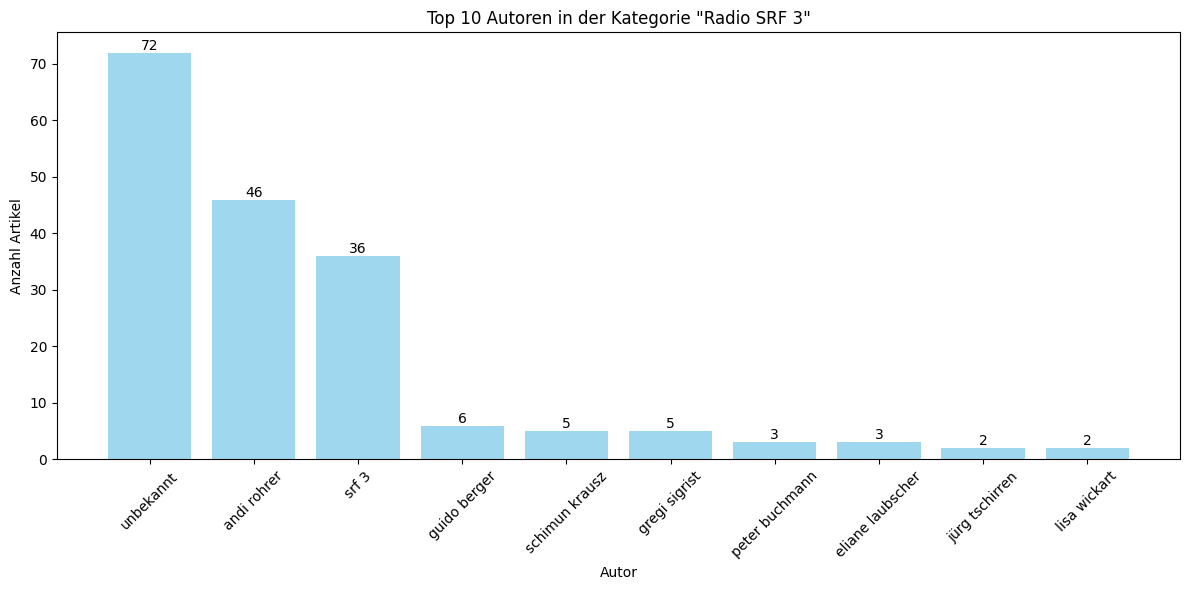

In [18]:
# Bar chart for the top 10 authors in the "Radio SRF 3" category
plt.figure(figsize=(12, 6))
bars = plt.bar(srf3_author_counts.index, srf3_author_counts.values, color='skyblue', alpha=0.8)
plt.xlabel('Autor')
plt.ylabel('Anzahl Artikel')
plt.title('Top 10 Autoren in der Kategorie "Radio SRF 3"')
plt.xticks(rotation=45)

# Annotate the bars with the count values
for bar, count in zip(bars, srf3_author_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Das sind die 10 häufisgten Autoren, wobei ein Autor SRF3 ist und einer Rohrer im Namen hat.
Beim Suchbegriff `Rohrer` werden 51 Artikel alleinig wegen dem Autor und nicht aufgrund des restlichen Artikels gescrapt.
Da`SRF 3` kein Mensch ist wird der "Autor" hier vermutlich als Oberbegriff von Publikationen die aus einer SRF 3 Sendung mit mehreren Personen entsanden ist verwendet. Das soll bei einer vertieften Analyse untersucht werden.   

### Duplikate

Betrachtet die Artikel die wir bei mehr wie einem Nachnamen gescrapt haben.

In [19]:
# Gruppieren nach Titel und Kategorie, Suchbegriffe als Liste sammeln
duplicate_titles = (
    data.groupby(['Titel', 'Kategorie'])['Suchbegriff']
    .apply(list)
    .reset_index()
)

# Nur Titel behalten, die mehr als einmal vorkommen (unabhängig von Kategorie)
titel_counts = data['Titel'].value_counts()
mehrfach_titel = titel_counts[titel_counts > 1].index

duplicate_titles = duplicate_titles[duplicate_titles['Titel'].isin(mehrfach_titel)]

# Ausgabe
duplicate_titles

,Titel,Kategorie,Suchbegriff
19,10 Schweizer Biathleten für die WM aufgeboten,Sport,"[Torres, Winter]"
59,2 Penalty-Tore: St. Gallen erkämpft sich in Un...,Sport,"[Schmidt, Luder]"
100,3. Remis in Folge: Schmidts Wolfsburg stagniert,Sport,"[Schmid, Schmidt]"
121,"4. Niederlage in Folge, aber Schmidt darf (vor...",Sport,"[Schmid, Schmidt]"
153,5. Gold und Rekord für Dahlmeier – Schempp si...,Sport,"[Torres, Meier]"
...,...,...,...
11105,"«Wer will schon schlafen, wenn es so wunderbar...",Kultur,"[Müller, Walser, Schmidt]"
11109,"«Wichtig ist, dass man den Anschluss nicht ver...",Kultur,"[Senn, Rohrer]"
11122,«Wie wenn man in einem Tagebuch liest»,News,"[Schmid, Schmidt]"
11125,«Wir Jungen haben genug von ewigen Diskussionen»,News,"[Schmid, Schmidt]"


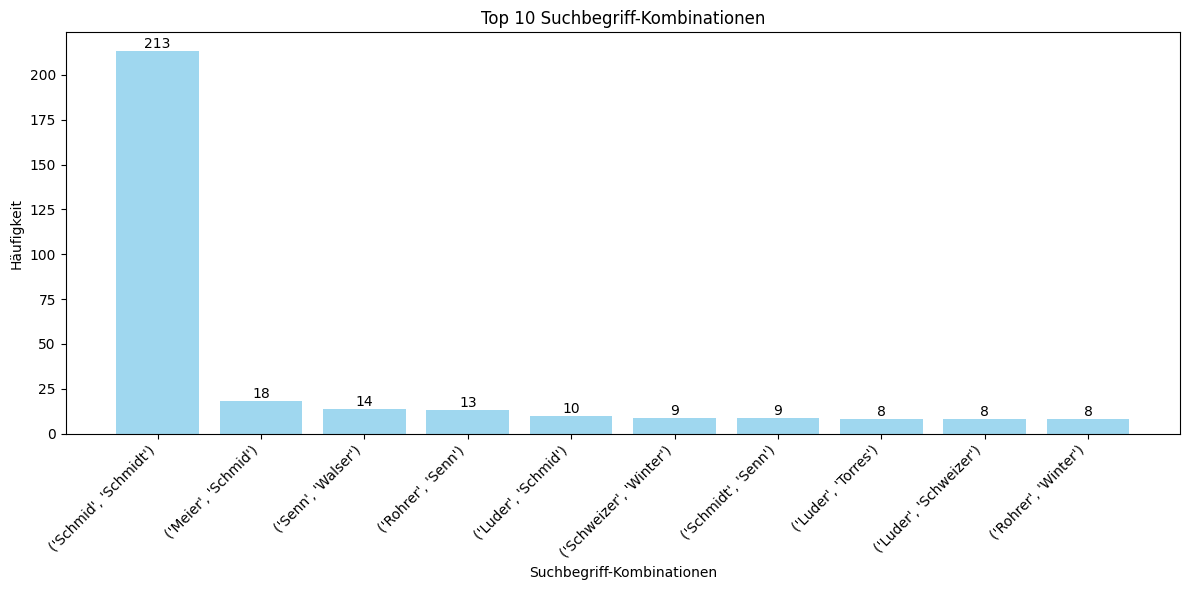

In [20]:
# Zähle die Häufigkeit der Suchbegriff-Kombinationen
duplicate_counts = duplicate_titles['Suchbegriff'].apply(lambda x: tuple(sorted(x))).value_counts().head(10)

# Erstelle den Barchart
plt.figure(figsize=(12, 6))
bars = plt.bar(duplicate_counts.index.astype(str), duplicate_counts.values, color='skyblue', alpha=0.8)
plt.xlabel('Suchbegriff-Kombinationen')
plt.ylabel('Häufigkeit')
plt.title('Top 10 Suchbegriff-Kombinationen')
plt.xticks(rotation=45, ha='right')

# Werte über den Balken anzeigen
for bar, count in zip(bars, duplicate_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

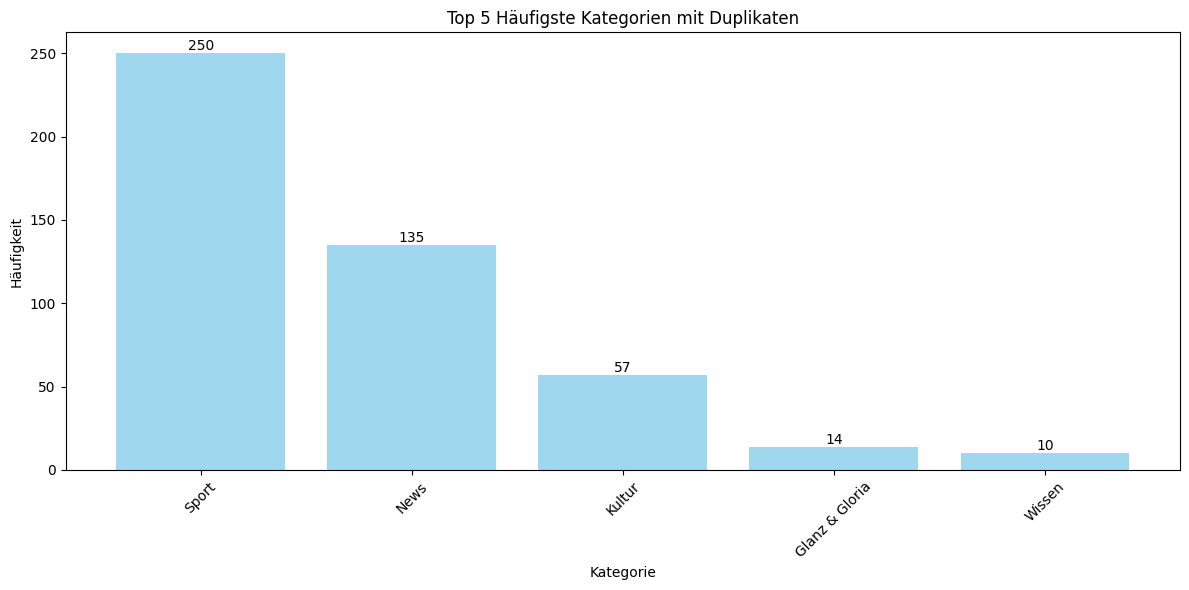

In [21]:
# Häufigkeiten der Kategorien zählen
category_counts = duplicate_titles['Kategorie'].value_counts()
category_counts = category_counts.head(5)

# Barchart erstellen
plt.figure(figsize=(12, 6))
bars = plt.bar(category_counts.index, category_counts.values, color='skyblue', alpha=0.8)
plt.xlabel('Kategorie')
plt.ylabel('Häufigkeit')
plt.title('Top 5 Häufigste Kategorien mit Duplikaten')
plt.xticks(rotation=45)

# Werte über den Balken anzeigen
for bar, count in zip(bars, category_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [22]:
# Anzahl der Duplikate berechnen
anzahl_duplikate = len(duplicate_titles)

# Ausgabe
print(f"Insgesamt gibt es {anzahl_duplikate} Duplikate, was {anzahl_duplikate / len(data) * 100:.2f}% der gesamten Artikel entspricht.")

Insgesamt gibt es 520 Duplikate, was 4.42% der gesamten Artikel entspricht.


Die wichtigste Erkenntnis ist, dass ein Artikel bei mehreren Nachnamen vorkommen kann. Am häufigsten passierte diese Überschneidung bei den Kategorien `Sport`, `News` und `Kultur`.